In [1]:
# 1. Impor semua library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [3]:
# 2. Membaca dataset yang telah diupload
df = pd.read_csv('Sales Dataset.csv')
df.head()


,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12



Dataset ini biasanya digunakan untuk menganalisis dan memprediksi pola transaksi penjualan berdasarkan sejumlah fitur yang tersedia. Meskipun konteks penggunaannya bisa bervariasi (termasuk prediksi biaya asuransi dalam beberapa kasus), dalam studi ini dataset digunakan untuk mengklasifikasikan kategori produk (Category) berdasarkan fitur-fitur penjualan.

Dataset terdiri dari beberapa kolom yang mewakili berbagai atribut, antara lain:

- Order ID: ID unik untuk setiap transaksi.
- Amount: Jumlah pembayaran dari suatu transaksi.
- Profit: Keuntungan yang diperoleh dari transaksi tersebut.
- Quantity: Jumlah item yang dibeli.
- Category: Jenis kategori produk (target klasifikasi).
- Sub-Category: Subkategori produk.
- PaymentMode: Metode pembayaran yang digunakan pelanggan.
- Order Date: Tanggal pemesanan dilakukan.
- CustomerName: Nama pelanggan.
- State: Negara bagian tempat pemesanan dilakukan.
- City: Kota tempat pelanggan berada.
- Year-Month: Informasi waktu dalam format tahun-bulan.

Dalam analisis ini, digunakan 4 fitur utama (Amount, Profit, Quantity, dan PaymentMode) untuk memprediksi kolom Category menggunakan algoritma klasifikasi seperti Naive Bayes** dan **K-Nearest Neighbors (KNN).



In [11]:
df.tail()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
1189,B-26370,8825,3594,15,Furniture,Tables,Debit Card,2024-07-31,Megan Mclean,New York,New York City,2024-07
1190,B-26298,2082,642,8,Electronics,Phones,EMI,2020-06-02,Caitlin Hunt,New York,Rochester,2020-06
1191,B-26298,2082,642,8,Electronics,Phones,EMI,2022-12-15,Jenna Holland,Texas,Austin,2022-12
1192,B-26298,2082,642,8,Electronics,Phones,EMI,2020-08-07,Stephanie Oconnell,New York,Buffalo,2020-08
1193,B-25068,914,163,13,Office Supplies,Markers,UPI,2024-10-26,Andrea Hill,Illinois,Chicago,2024-10


Dataset ini memiliki 1193 pengamatan

#**PREPROCESSING DATA**

In [4]:
# 3. Memilih fitur dan kolom target untuk klasifikasi
# Fitur yang digunakan: Amount, Profit, Quantity, PaymentMode
# Target: Category
features = ['Amount', 'Profit', 'Quantity', 'PaymentMode']
target = 'Category'

# Salin ke dataframe baru
df_model = df[features + [target]].copy()


4 fitur utama dan 1 kolom target (Category) yang akan digunakan untuk klasifikasi.

In [5]:
# 4. Encode kolom kategorikal menjadi angka
le_dict = {}
for col in df_model.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le


In [6]:
# 5. Normalisasi fitur numerik
X = df_model[features]
y = df_model[target]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Data numerik seperti Amount, Profit, dan Quantity dinormalisasi supaya semua fitur berada pada skala yang sama (rata-rata 0, standar deviasi 1), terutama penting untuk KNN.

In [19]:
# 6. Membagi data menjadi data latih (train) dan data uji (test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Data dibagi menjadi:

80% untuk pelatihan (training)

20% untuk pengujian (testing)



#**Model Naive Bayes**

Akurasi Naive Bayes: 0.34


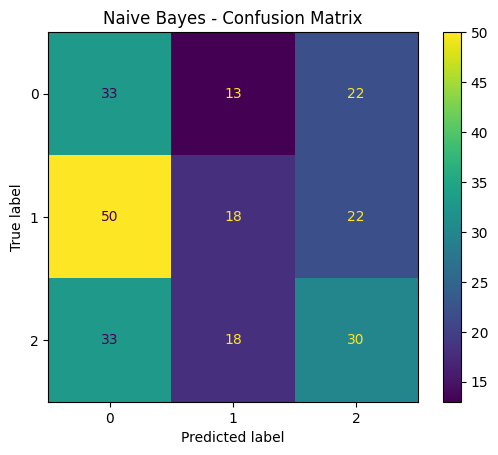

In [20]:

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Evaluasi Naive Bayes
acc_nb = accuracy_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(f"Akurasi Naive Bayes: {acc_nb:.2f}")

# Visualisasi confusion matrix
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp_nb.plot()
plt.title("Naive Bayes - Confusion Matrix")
plt.show()


Membuat model Naive Bayes (GaussianNB)

Melatih model dengan data training

Menggunakan model untuk memprediksi hasil dari data uji

#**Model K-Nearest Neighbors (KNN)**

 Akurasi KNN: 0.41


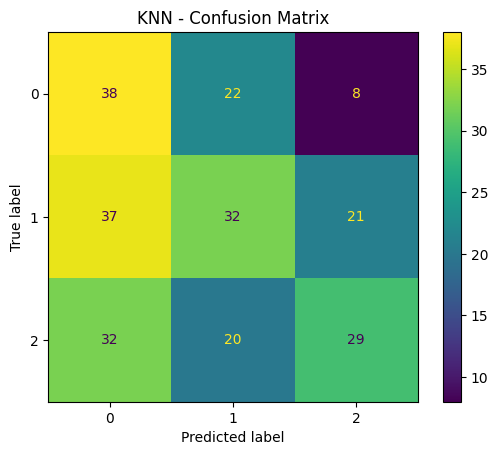

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluasi KNN
acc_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(f" Akurasi KNN: {acc_knn:.2f}")

# Visualisasi confusion matrix
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()
plt.title("KNN - Confusion Matrix")
plt.show()


Membuat model KNN dengan k = 5

Melatih model dan melakukan prediksi seperti sebelumnya

In [21]:
# Menampilkan akurasi dalam bentuk persentase
print(f" Akurasi Naive Bayes: {acc_nb * 100:.2f}%")
print(f" Akurasi KNN        : {acc_knn * 100:.2f}%")


 Akurasi Naive Bayes: 33.89%
 Akurasi KNN        : 41.42%



### **Kesimpulan Analisis Klasifikasi pada Sales Dataset**

Pada analisis ini digunakan dua algoritma klasifikasi, yaitu Naive Bayes dan K-Nearest Neighbors (KNN), untuk memprediksi kategori produk (Category) berdasarkan empat fitur: Amount, Profit, Quantity, dan PaymentMode.

####  Hasil Evaluasi Model:
- Naive Bayes menghasilkan akurasi sebesar **33.89%**
- K-Nearest Neighbors (KNN) menghasilkan akurasi sebesar **41.42%**

####  Analisis:
- Akurasi kedua model tergolong rendah, yang mengindikasikan bahwa fitur-fitur yang digunakan mungkin belum cukup kuat atau representatif untuk memprediksi target `Category` secara akurat.
- KNN menghasilkan akurasi lebih tinggi dibandingkan Naive Bayes, menunjukkan bahwa metode berbasis tetangga lebih cocok untuk pola distribusi data pada dataset ini.
- Naive Bayes mungkin kurang optimal karena adanya korelasi antar fitur, yang bertentangan dengan asumsi independensi pada algoritma ini.

